# Preprocessing The Data

#### Finding Number of images in Each Set
Lets check how many images we have for each class in train and test sets.

#### Normalization

In order to speedup the training time we can devide the image matrices by 255 to map them to the range of [0,1].

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')


# Reading The Train Set
train_images_file = open('train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_images, train_labels = [], []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    train_images.append(image)
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    train_labels.append(label)
    
    # train_set.append((aimage, label))


# Reading The Test Set
test_images_file = open('t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_images, test_labels = [], []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    test_images.append(image)
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    test_labels.append(label)


# Plotting an image
# show_image(train_set[0][0])
plt.show()

Now I will convert lists to arrays

In [9]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

#### Shuffle the Image and Labels Matrices

We should write a shuffle function to perform it on the data because we need it later in backpropagation process.

In [10]:
from sklearn.utils import shuffle
import time

def shuffle_together(x, y):
  return shuffle(x, y, random_state=int(time.time()))

train_images, train_labels = shuffle_together(train_images, train_labels)
test_images, test_labels = shuffle_together(test_images, test_labels)

In [25]:
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1]))
test_images = test_images.reshape((test_images.shape[0], test_images.shape[1]))
train_labels = train_labels.reshape((train_labels.shape[0], train_labels.shape[1]))
test_labels = test_labels.reshape((test_labels.shape[0], test_labels.shape[1]))

In [26]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


# Implementing The Non Vectorized Neural Network

Out neural network architecture is as following:  
Input Layer: 784 neurons  
Hidden Layer 1: 16 neurons  
Hiddden Layer 2: 16 neurons  
Output Layer: 10 neurons  

In each layer except the input layer, we use sigmoid activation function.  


We initilalize bias vectors to 0 and weight vectors to a normal distribution. 

In order to calculate gradients we should implement backpropagation prcoess. This is done using chain rule. We can calculate the gradients with respect to one input data as follows:  
<br>
$Cost = \sum_{j=0}^{3}(a_j^{(3)} - y_j)^2$ 

<br> 

$\frac{∂_{Cost}}{∂_{a_j^{(3)}}} = 2(a_j^{(3)} - y_i)$ 

$\frac{∂_{Cost}}{∂_{net_j^{(3)}}} = \frac{∂_{Cost}}{∂_{b_j^{(3)}}} = 2(a_j^{(3)} - y_i)\sigma(net_j^{(3)})(1 - \sigma((net_j^{(3)})))$  

$\frac{∂_{Cost}}{∂_{w_{ji}^{(3)}}} = 2(a_j^{(3)} - y_i)\sigma(net_j^{(3)})(1 - \sigma(net_j^{3}))a_i^{(2)}$  

<br>

$\frac{∂_{Cost}}{∂_{a_j^{(2)}}} = \sum_{i = 0}^{3} 2(a_i^{(3)} - y_i)\sigma(net_i^{(3)})(1 - \sigma(net_i^{(3)})) w_{ij}$  

$\frac{∂_{Cost}}{∂_{net_j^{(2)}}} = \frac{∂_{Cost}}{∂_{b_j^{(2)}}} = [\sum_{i = 0}^{3} 2(a_i^{(3)} - y_i)\sigma(net_i^{(3)})(1 - \sigma(net_i^{(3)})) w_{ij}] \sigma(net_j^{(2)})(1 - \sigma(net_j^{(2)})$ 

$\frac{∂_{Cost}}{∂_{w_{jk}^{(2)}}} = [\sum_{i = 0}^{3} 2(a_i^{(3)} - y_i)\sigma(net_i^{(3)})(1 - \sigma(net_i^{(3)})) w_{ij}] \sigma(net_j^{(2)})(1 - \sigma(net_j^{(2)}))a_k^{(2)}$ 

and the same goes for 1st hidden layer.  

Here is the implementation of our neural network.


Accuracy of NN without training: 7.000000000000001%


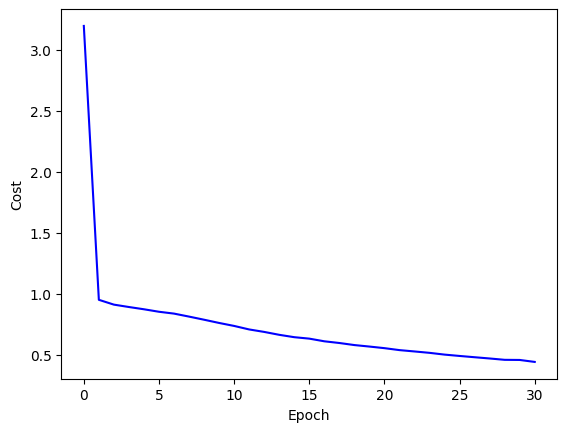

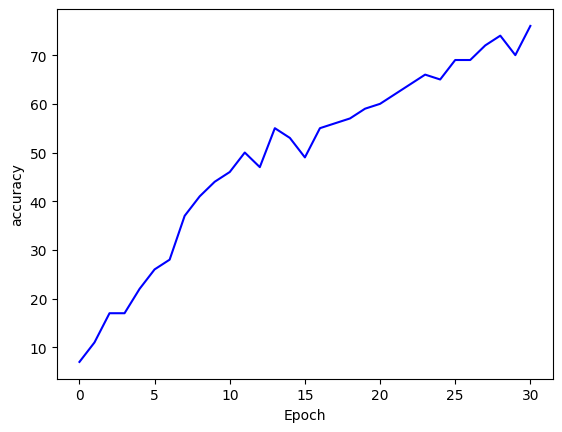

Accuracy of NN after training: 76.0%
Training Time: 23.916679859161377s


In [35]:
class NeuralNetwork:
  '''This is a base class for nerual network.'''
  
  def __init__(self, hidden_layers_sizes: list, input_data, labels, batch_size = 10, alpha = 1, epochs=20):
    self.input_data = np.copy(input_data)
    self.labels = np.copy(labels)
    self.num_of_data = input_data.shape[0]
    self.batch_size = batch_size
    self.alpha = alpha
    self.epochs = epochs
    self.hidden_layers_sizes = hidden_layers_sizes

  def sigmoid(self, z):
    return 1 /(1 + np.exp(-z))

  def calc_accuracy(self):
    correct = 0
    for i in range(self.num_of_data):
      self.forward_prop(i)
      index = np.argmax(self.a[-1])
      if self.labels[i][index] == 1:
        correct += 1
    return correct / self.num_of_data * 100
  
  def cost(self):
    s = 0
    for i in range(self.num_of_data):
      self.forward_prop(i)
      diff = self.a[-1] - self.labels[i].reshape(self.a[-1].shape[0], 1)
      s += np.matmul(diff.T, diff)
    return s[0,0] / self.num_of_data
  
  def create_weight_vectors(self):
    weights = []
    #adding first hidden layer weights
    weights.append(np.random.normal(0, 1, size = (self.hidden_layers_sizes[0], self.input_data.shape[1])))
    # adding other hidden layer weights
    for i in range(len(self.hidden_layers_sizes) - 1):
      weights_i = np.random.normal(0, 1, size=(self.hidden_layers_sizes[i + 1], self.hidden_layers_sizes[i]))
      weights.append(weights_i)
    # adding output layer weights
    weights.append(np.random.normal(0, 1, size = (self.labels.shape[1], self.hidden_layers_sizes[-1])))
    return weights

  def create_weight_gradient_vectors(self):
    weights_gradient = []
    #adding first hidden layer weights gradient
    weights_gradient.append(np.zeros((self.hidden_layers_sizes[0], self.input_data.shape[1]), dtype=np.float64))
    # adding other hidden layer weights gradient
    for i in range(len(self.hidden_layers_sizes) - 1):
      weights_i = np.zeros((self.hidden_layers_sizes[i + 1], self.hidden_layers_sizes[i]), dtype=np.float64)
      weights_gradient.append(weights_i)
    # adding output layer weights gradient
    weights_gradient.append(np.zeros((self.labels.shape[1], self.hidden_layers_sizes[-1]), dtype=np.float64))
    return weights_gradient

class NonVectorizedNeuralNetwork(NeuralNetwork):

  def __init__(self, hidden_layers_sizes: list, input_data, labels, batch_size = 10, alpha = 1, epochs=20):
    super().__init__(hidden_layers_sizes, input_data, labels, batch_size = batch_size, alpha = alpha, epochs=epochs)
    
    self.weights = self.create_weight_vectors()
    self.weights_gradient = self.create_weight_gradient_vectors()
    self.biases = self.__create_zero_vectors()
    self.biases_gradient = self.__create_zero_vectors()
    self.a = self.__create_zero_vectors()
    self.a_gradient = self.__create_zero_vectors()
    self.nets = self.__create_zero_vectors()
  
  def __create_zero_vectors(self):
    vectors = []
    #adding first hidden layer
    vectors.append(np.zeros((self.input_data.shape[1], 1), dtype=np.float64))
    # adding other hidden layer
    for i in range(len(self.hidden_layers_sizes)):
      bias_i = np.zeros((self.hidden_layers_sizes[i], 1), dtype=np.float64)
      vectors.append(bias_i)
    # adding output layer
    vectors.append(np.zeros((self.labels.shape[1], 1), dtype=np.float64))
    return vectors

  def forward_prop(self, i: int):
    self.a[0] = self.input_data[i].reshape(self.input_data.shape[1], 1)
    for i in range(len(self.a) - 1):
      self.nets[i + 1] = np.matmul(self.weights[i], self.a[i]) + self.biases[i + 1]
      self.a[i + 1] = self.sigmoid(self.nets[i + 1])
      

  def back_prop(self):
    costs = [self.cost()]
    accuracies = [self.calc_accuracy()]
    epochs = [0]
    # iterating each epoch
    for i in range(self.epochs):
      # shuffle the data
      self.input_data, self.labels = shuffle_together(self.input_data, self.labels)
      for j in range(self.num_of_data // self.batch_size + 1):
        # creating weights and bias gradient matrices
        weights_gradient = self.create_weight_gradient_vectors()
        biases_gradient = self.__create_zero_vectors()

        # determine range of the batch
        start_data = j * self.batch_size
        end_data = (j + 1) * self.batch_size
        end_data = min(self.num_of_data, end_data)
          
        for k in range(start_data, end_data):
          # forward prop for each data in batch
          self.forward_prop(k)

          # backprop for each data in batch
          self.__calc_back_prop_gradient(k)

          # sum gradients for eacg data in batch
          for p in range(len(weights_gradient)):
            weights_gradient[p] += self.weights_gradient[p]
            biases_gradient[p] += self.biases_gradient[p]
          biases_gradient[-1] += self.biases_gradient[-1]
        
        # update weights and biases
        for k in range(len(weights_gradient)):
          self.weights[k] -= self.alpha * (weights_gradient[k] / self.batch_size)
          self.biases[k] -= self.alpha * (biases_gradient[k] / self.batch_size)
        self.biases[-1] -= self.alpha * (biases_gradient[-1] / self.batch_size)

      costs.append(self.cost())
      accuracies.append(self.calc_accuracy())
      epochs.append(i + 1)
    return epochs, costs, accuracies
  


  def __calc_back_prop_gradient(self, j):
    # calculate gradient of the last layer with respect to a
    for i in range(self.a_gradient[-1].shape[0]):
      self.a_gradient[-1][i, 0] = 2 * (self.a[-1][i, 0] - self.labels[j][i])
    
    for i in range(len(self.a) - 1, 0, -1):
      # update bias gradient of layer i
      for k in range(self.biases_gradient[i].shape[0]):
        self.biases_gradient[i][k, 0] = self.a_gradient[i][k, 0] * self.sigmoid(self.nets[i][k, 0]) * (1 - self.sigmoid(self.nets[i][k, 0]))
      
      # update weights gradient of layer i - 1
      for k in range(self.weights_gradient[i - 1].shape[0]):
        for p in range(self.weights_gradient[i - 1].shape[1]):
          self.weights_gradient[i - 1][k, p] = self.biases_gradient[i][k, 0] * self.a[i -1][p, 0]

      # update A gradient of layer i - 1
      for k in range(self.a_gradient[i - 1].shape[0]):
        s = 0
        for p in range(self.biases_gradient[i].shape[0]):
          s += self.biases_gradient[i][p, 0] * self.weights[i - 1][p, k]
        self.a_gradient[i - 1][k, 0] = s
    
  def print_weights(self):
    for i in range(len(self.a) - 1, 0, -1):
      print(f"a {i}:\n {self.a[i]}")
      print(f"b {i}:\n {self.biases[i]}")
      print(f"w {i}:\n {self.weights[i - 1]}")

      print(f"a gradient {i}:\n {self.a_gradient[i]}")
      print(f"b gradient {i}:\n {self.biases_gradient[i]}")
      print(f"w gradient {i}:\n {self.weights_gradient[i - 1]}")


def plot_diagram(x, y, xlabel='Epoch', ylabel='Cost'):
  plt.figure()
  plt.plot(x, y, 'b')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()
    

nn = NonVectorizedNeuralNetwork([16,16], train_images[:100], train_labels[:100], epochs=30)
print(f"Accuracy of NN without training: {nn.calc_accuracy()}%")
start_time = time.time()
epochs, costs, acc = nn.back_prop()
end_time = time.time()
plot_diagram(epochs, costs)
plot_diagram(epochs, acc, ylabel='accuracy')
print(f"Accuracy of NN after training: {nn.calc_accuracy()}%")
print(f"Training Time: {end_time - start_time}s")

# Implementing The Vectorized Neural Network

In the previous section I used vectorized form of calculation in forward propagation but not for back propagation. In this section I convert the previous back propagation code to the vectorized form.

Accuracy of NN without training: 10.0%


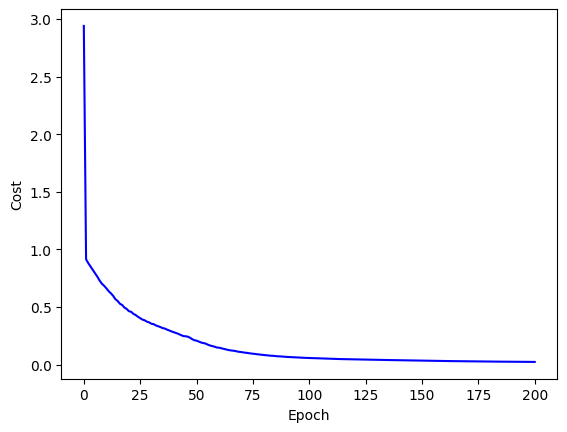

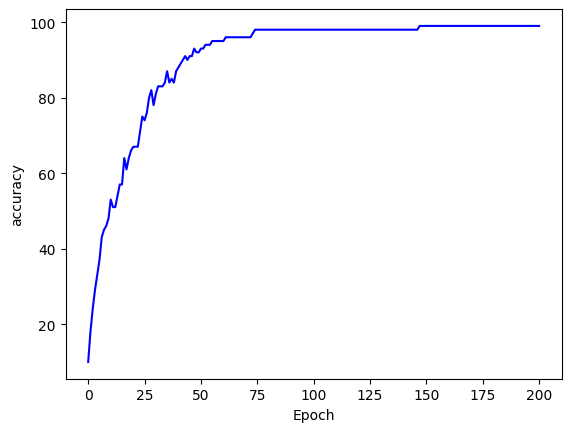

Accuracy of NN after training: 99.0%
Training Time: 1.9065217971801758s


In [37]:
class VectorizedNeuralNetwork(NeuralNetwork):
  def __init__(self, hidden_layers_sizes, input_data, labels, batch_size = 10, alpha = 1, epochs=200):
    super().__init__(hidden_layers_sizes, input_data, labels, batch_size = batch_size, alpha = alpha, epochs=epochs)

    self.weights = self.create_weight_vectors()
    self.weights_gradient = self.create_weight_gradient_vectors()
    self.biases = None
    self.biases_gradient = None
    self.a = None
    self.a_gradient = None
    self.nets = None

  def set_new_data(self, input_data, labels):
    self.input_data = np.copy(input_data)
    self.labels = np.copy(labels)
    self.num_of_data = input_data.shape[0]

  def __create_zero_vectors(self, sample_size):
    vectors = []
    #adding first hidden layer
    vectors.append(np.zeros((self.input_data.shape[1], sample_size), dtype=np.float64))
    # adding other hidden layer
    for i in range(len(self.hidden_layers_sizes)):
      bias_i = np.zeros((self.hidden_layers_sizes[i], sample_size), dtype=np.float64)
      vectors.append(bias_i)
    # adding output layer
    vectors.append(np.zeros((self.labels.shape[1], sample_size), dtype=np.float64))
    return vectors

  def calc_accuracy(self):
    self.forward_prop(self.input_data.T)
    diff = np.argmax(self.a[-1], axis = 0) - np.argmax(self.labels.T, axis = 0)
    return np.count_nonzero(diff==0) / self.num_of_data * 100

  def forward_prop(self, X):
    self.a = self.__create_zero_vectors(X.shape[1])
    self.a_gradient = self.__create_zero_vectors(X.shape[1])
    self.biases = self.__create_zero_vectors(X.shape[1])
    self.biases_gradient = self.__create_zero_vectors(X.shape[1])
    self.nets = self.__create_zero_vectors(X.shape[1])

    self.a[0] = X
    for i in range(len(self.a) - 1):
      self.nets[i + 1] = np.matmul(self.weights[i], self.a[i]) + self.biases[i + 1]
      self.a[i + 1] = self.sigmoid(self.nets[i + 1])
  
  def cost(self):
    self.forward_prop(self.input_data.T)
    diff = self.a[-1] - self.labels.T
    s = np.sum(diff * diff)
    return s / self.num_of_data

  def back_prop(self):
    costs = [self.cost()]
    accuracies = [self.calc_accuracy()]
    epochs = [0]
    # iterating each epoch
    for i in range(self.epochs):
      #shuffle the data
      self.input_data, self.labels = shuffle_together(self.input_data, self.labels)
      for j in range(self.num_of_data // self.batch_size + 1):
        # determine range of the batch
        start_data = j * self.batch_size
        end_data = (j + 1) * self.batch_size
        end_data = min(self.num_of_data, end_data)    

        # creating weight and bias gradient matrices
        weights_gradient = self.create_weight_gradient_vectors()
        biases_gradient = self.__create_zero_vectors(end_data - start_data)
        
        # forward prop
        batch_data = self.input_data[start_data:end_data]
        self.forward_prop(batch_data.T)

        # calculate backprop gradients
        self.__calc_back_prop_gradient(start_data, end_data)

        # sum gradients
        for p in range(len(weights_gradient)):
            weights_gradient[p] += self.weights_gradient[p]
            biases_gradient[p] += self.biases_gradient[p]
        biases_gradient[-1] += self.biases_gradient[-1]
        
        # update weights and biases
        for k in range(len(weights_gradient)):
          self.weights[k] -= self.alpha * (weights_gradient[k] / self.batch_size)
          self.biases[k] -= self.alpha * (biases_gradient[k] / self.batch_size)
        self.biases[-1] -= self.alpha * (biases_gradient[-1] / self.batch_size)
      
      costs.append(self.cost())
      accuracies.append(self.calc_accuracy())
      epochs.append(i + 1)
    return epochs, costs, accuracies

  def __calc_back_prop_gradient(self, i, j):
    # calculate gradient of the last layer with respect to a
    self.a_gradient[-1] = 2 * (self.a[-1] - self.labels[i:j].T)
    
    for i in range(len(self.a) - 1, 0, -1):
      # update bias gradient of layer i
      self.biases_gradient[i] = self.a_gradient[i] * self.sigmoid(self.nets[i]) * (1 - self.sigmoid(self.nets[i]))
      
      # update weights gradient of layer i - 1
      self.weights_gradient[i - 1] = np.matmul(self.biases_gradient[i], self.a[i - 1].T)

      # update A gradient of layer i - 1
      self.a_gradient[i - 1] = np.matmul(self.weights[i - 1].T, self.biases_gradient[i])

nn = VectorizedNeuralNetwork([16,16], train_images[:100], train_labels[:100])
print(f"Accuracy of NN without training: {nn.calc_accuracy()}%")
start_time = time.time()
epochs, costs, acc = nn.back_prop()
end_time = time.time()
plot_diagram(epochs, costs)
plot_diagram(epochs, acc, ylabel='accuracy')
print(f"Accuracy of NN after training: {nn.calc_accuracy()}%")
print(f"Training Time: {end_time - start_time}s")


# Testing The Network

Now we can test the network with more data. I'll use 60000 data from our 10 classes.

Accuracy of NN without training (Training set): 9.48%


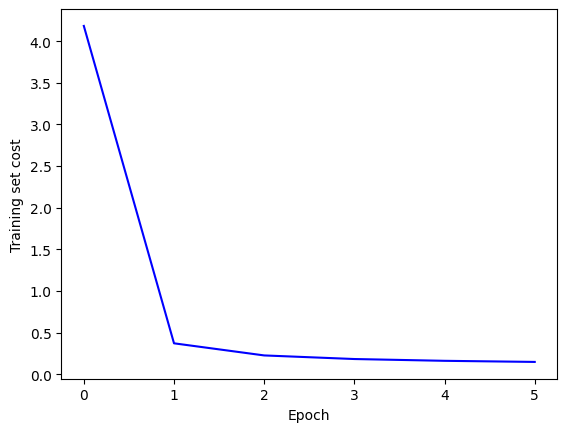

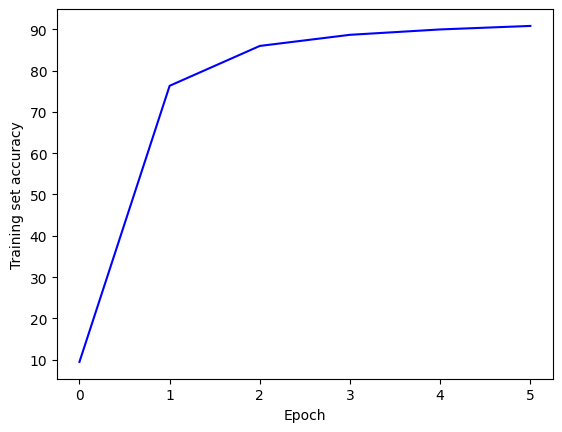

Accuracy of NN after training (Training set): 90.79833333333333%
Training Time: 15.679389238357544s

Accuracy of NN after training (Test set): 90.36999999999999%


In [31]:
train_images, train_labels = shuffle_together(train_images, train_labels)

# Train the network
nn = VectorizedNeuralNetwork([16,16], train_images[:60000], train_labels[:60000], epochs=5, batch_size=50, alpha=1)
print(f"Accuracy of NN without training (Training set): {nn.calc_accuracy()}%")
start_time = time.time()
epochs, costs, acc = nn.back_prop()
end_time = time.time()
plot_diagram(epochs, costs, ylabel='Training set cost')
plot_diagram(epochs, acc, ylabel='Training set accuracy')
print(f"Accuracy of NN after training (Training set): {nn.calc_accuracy()}%")
print(f"Training Time: {end_time - start_time}s\n")

# Calculate accuracy of test set
test_images, test_labels = shuffle_together(test_images, test_labels)
nn.set_new_data(test_images, test_labels)
print(f"Accuracy of NN after training (Test set): {nn.calc_accuracy()}%")